In [ ]:
"""
Suppose a sorted array is rotated at some pivot unknown to you beforehand.
(i.e., 0 1 2 4 5 6 7 might become 4 5 6 7 0 1 2).
You are given a target value to search. If found in the array return its index, otherwise return -1.
You may assume no duplicate exists in the array.
behand 预先准备好的
pivot  枢轴;中心点，中枢

"""
class Solution:
    def search(self, A, target):
        """
        start   mid      end
        Case 1: no rotation, just normal binary search
        1, 2, 3, 4, 5, 6, 7

        Case 2: rotate a little (rotate right) (i.e. A[mid]<A[start] and A[mid]<A[end])
        7, 1, 2, 3, 4, 5, 6
        if target<A[mid]: search left
        if target>A[mid] and target<A[end]: search right
        if target>A[mid] and target>A[end]: search left

        Case 3: rotate a lot (rotate left) (i.e. A[mid]>A[start] and A[mid]>A[end])
        2, 3, 4, 5, 6, 7, 1
        if target>A[mid]: search right
        if target<A[mid] and target>A[start]: search left
        if target<A[mid] and target<A[start]: search right
        
        """
        length =len(A)
        start =0
        end =length-1 #  [start, end]
        while start <=end:
            mid =(start +end)//2
            # find
            if A[mid] ==target:
                return mid
            # case 1
            if A[start] < A[mid] < A[end]:
                if target >A[mid]:
                    start =mid +1
                else:
                    end =mid -1
            # case 2
            elif A[start] >A[mid] and A[mid] < A[end]:
                if target >A[mid] and target <=A[end]:
                    start =mid +1
                else:
                    end =mid -1
            else:
                if target< A[mid] and target >= A[start]:
                    end =mid -1
                else:
                    start =mid +1
        return -1
if __name__ =="__main__":
    print(Solution().search([7,1,2,3,4,5,6], 7))

"""
Given a sorted array and a target value, return the index if the target is found. If not, return the index 
where it would be if it were inserted in order.
You may assume no duplicates in the array.
Here are few examples.
[1,3,5,6], 5 -> 2
[1,3,5,6], 2 -> 1
[1,3,5,6], 7 -> 4
[1,3,5,6], 0 -> 0
?? donot understand the search_insert can still work even if the array donot have the target value, it's so
amazing

"""
class Solution:
    def search_insert(self, A, target):
        length =len(A)
        if not A or length ==0:
            return 0
        start =0
        end =length
        
        while start<end:
            mid =(start+end)//2
            if target ==A[mid]:
                return mid
            elif target < A[mid]:
                end =mid
            else:
                start =mid +1
        return start   

if __name__ =="__main__":
    assert Solution().searchInsert([1, 3, 5, 6], 5)==2
    assert Solution().searchInsert([1, 3, 5, 6], 2)==1
    assert Solution().searchInsert([1, 3, 5, 6], 7)==4
    assert Solution().searchInsert([1, 3, 5, 6], 0)==0

"""
Determine if a Sudoku is valid, according to: Sudoku Puzzles - The Rules.
The Sudoku board could be partially filled, where empty cells are filled with the character '.'.
A partially filled sudoku which is valid.
Note:
A valid Sudoku board (partially filled) is not necessarily solvable. Only the filled cells need to be
validated.
判断一个数独是否是有效的
判断给定的数独是否满足规则，即每行中没有重复元素、每列中没有重复元素、每个3*3的块中也没有重复元素
"""  

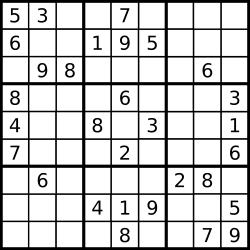

In [ ]:
"""
donnot understand board[i/3*3+j/3][i%3*3+j%3]??

        Squares lie on 3 big rows; index for the 3 big rows: i/3*3-th, thus iteration pattern: 000, 333, 666
        Subdivide the 1 big rows into 3 small rows; index for the 3 small rows: j/3-th, thus iteration 
        pattern 000, 111, 222)
        Squares lie on 3 big column; index for the 3 big column: i%3*3-th, thus iteration pattern: 
        (036, 036, 036)
        Subdivide the 1 big column into 3 small column; index for the 3 small columns: j%3-th, 
        thus iteration pattern 012, 012, 012)
        thus, iterate by board[i/3*3+j/3][i%3*3+j%3]
"""
class Solution:
    def is_valid_sudoku(self, board):
        for i in range(9):
            row =[]
            column =[]
            square =[]
            for j in range(9):
                # check row
                try:
                    row_element =int(board[i][j])
                    if row_element in row:
                        return False
                    else:
                        row.append(row_element)
                except ValueError:
                    pass
                
                # check column
                try:
                    column_element =int(board[j][i])
                    if column_element in column:
                        return False
                    else:
                        column.append(column_element)
                except ValueError:
                    pass
                #check square
                try:
                    square_element =int(board[i//3*3+j//3][i%3*3+j%3])
                    if square_element in square:
                        return False
                    else:
                        square.append(square_element)
                except ValueError:
                    pass
        return True
if __name__=="__main__":    
    assert Solution().is_valid_sudoku(
        ["..4...63.", ".........", "5......9.", "...56....", "4.3.....1", "...7.....", ".........",".........",
         "........."]
    )==True                
"""
cannot get it runable ...
Write a program to solve a Sudoku puzzle by filling the empty cells.
Empty cells are indicated by the character '.'.
You may assume that there will be only one unique solution.
"""
class Solution:
    def solve_sudoku(self, board):
        for row in range(len(board)):
            board[row] =list(board[row])
        self.solve(board)
        for row in range(len(board)):
            board[row] ="".join(board[row])
    def solve(self, board):
        n =len(board)
        if all([board[i//n][i%n] !="." for i in range(n*n)]):
            return True
        for i in range(n):
            for j in range(n):
                if board[i][j] =='.':
                    for num in range(1, 10):
                        num_str =str(num)
                        # row
                        condition_row =all([board[i][col] != num_str for col in range(n)])
                        # col 
                        condition_col =all([board[row][j] != num_str for row in range(n)])
                        #square
                        condition_square =all([board[i//3*3 +count//3][j//3*3+count%3] != num_str for count
                                              in range(n)])
                        if condition_row and condition_col and condition_square:
                            board[i][j] =num_str
                            if not self.solve(board):
                                board[i][j] ='.'
                            else:
                                return True
        return False
    
        
if __name__=="__main__":
    Solution().solve_sudoku(
        ["..9748...", "7........", ".2.1.9...", "..7...24.",".64.1.59.", ".98...3..", "...8.3.2.","........6",
         "...2759.."]
    )  
"""
题意就是迭代生成字符串：后一个字符串是前一个字符串每个连续出现的数字的个数＋该数字拼凑而成，用count记录连续数字的个数，
然后用key记录当前最新的数字，每次遇到不同的数字就把count+key拼接到结果当中，但注意如果遍历到最后一位时，
无论是否遇到新的字符都要把当前count+key加入结果中 
The count-and-say sequence is the sequence of integers beginning as follows:
1, 11, 21, 1211, 111221, ...
1 is read off as "one 1" or 11.
11 is read off as "two 1s" or 21.
21 is read off as "one 2, then one 1" or 1211.
Given an integer n, generate the nth sequence.
Note: The sequence of integers will be represented as a string.
"""
class Solution:
    def count_and_say(self, n):
        string ='1'
        for i in range(1, n):
            string =self.single_count_and_say(string)
        return string
    def single_count_and_say(self, num_string):
        string_builder =''
        i =0
        while i<len(num_string):
            j =i+1
            while j<len(num_string) and num_string[j] ==num_string[i]:
                j +=1
            count =j-i
            string_builder += str(count) +str(num_string[i])
            i =j
        return string_builder
if __name__ =="__main__":
    print(Solution().count_and_say(4))
"""
Given a set of candidate numbers (C) and a target number (T), find all unique combinations in C
where the candidate numbers sums to T.The same repeated number may be chosen from C 
unlimited number of times.
Note:
All numbers (including target) will be positive integers.
Elements in a combination (a1, a2, ... , ak) must be in non-descending order. (ie, a1 <= a2 <= ... <= ak).
The solution set must not contain duplicate combinations.
For example, given candidate set 2,3,6,7 and target 7,
A solution set is:
[7]
[2, 2, 3]
"""
class Solution:
    def combination_sum(self, candidates, target):
        candidates.sort()
        result =[]
        self.get_combination(target, candidates, [], result)
        return result
    def get_combination(self, target, candidates, current, result):
        if not candidates or sum(current) >target:
            return
        if sum(current) ==target:
            result.append(current)
            return
        
        # candidates[ind:] since possible repeat
        for ind, val in enumerate(candidates):
            self.get_combination(target, candidates[ind:], current+[val], result)
if __name__=="__main__":
    print(Solution().combination_sum([2,3,6,7], 7))



"""
Given a collection of candidate numbers (C) and a target number (T),
find all unique combinations in C where the candidate numbers sums to T.

Each number in C may only be used once in the combination.

Note:
All numbers (including target) will be positive integers.
Elements in a combination (a1, a2, ..., ak) must be in non-descending order. (i.e., a1 <= a2 <= ... <= ak).
The solution set must not contain duplicate combinations.
For example, given candidate set 10,1,2,7,6,1,5 and target 8,
A solution set is:
[1, 7]
[1, 2, 5]
[2, 6]
[1, 1, 6]
"""
class Solution:
    def combination_sum(self, candidates, target):
        result =[]
        candidates.sort()
        self.get_combination_sum(candidates, [], target, result)
        return result
    
    def get_combination_sum(self, candidates, cur, target, result):
        if sum(cur) ==target:
            result.append(cur)
            return
        if sum(cur) >target:
            return
        ind =0
        while ind <len(candidates):
            self.get_combination_sum(candidates[ind+1:], cur+[candidates[ind]], target, result)
            # avoid duplicate
            while ind+1 <len(candidates) and candidates[ind] ==candidates[ind+1]:
                ind +=1
            ind +=1
if __name__ =="__main__":
    print(Solution().combination_sum([10,1,2,7,6,1,5], 8))
                
 """
Given an unsorted integer array, find the first missing positive integer.

For example,
Given [1,2,0] return 3,
and [3,4,-1,1] return 2.

Your algorithm should run in O(n) time and uses constant space.
"""
class Solution:
    def first_missing_positive(self, A):
        if not A:
            return 1
        i =0
        length =len(A)
        # make the interger array right orderly
        while i< length:
            current =A[i]
            if current <=0 or current >length or A[current- 1] ==current:
                i +=1
            else:
                A[current-1], A[i] =current, A[current-1]
        for i in range(length):
            if A[i] != i+1:
                return i+1
        return A[-1] +1
if __name__=="__main__":
    assert Solution().first_missing_positive([3,4,-1,1]) ==2
                
        
